# Introducción a la visualización de Datos.

Algunos años atrás el reto era como obtener millones de datos, pero en la actualidad esto ya no es un problema, no más hay que visitar el sitio web de [ChEMBL](https://www.ebi.ac.uk/chembl/) donde podemos encontrar una cantidad interesante de moléculas bioactivas con ciertas características para ser utilizadas como parte de análisis en el desarrollo de nuevos medicamentos.

Pero el campo de los datos va más allá de su manipulación, también como científicos es valioso desarrollar habilidades relacionadas con la presentación de nuestros hallazgos. Y si quisiéramos ir un poco más allá, algo a tener en cuenta, es que aparte de una buena visualización es bueno tener una historia que contar.

En Notebooks anteriores aprendimos a manipular algunos conjuntos de datos y para ello hemos visto desde lo básico de Python hasta elementos más avanzados como lo son los [DataFrame](../2_PART_TWO/2.1_Dataframes.ipynb), ahora es tiempo de aprender a crear gráficas *(Visualizaciones)* utilizando dos de las librerías más famosas: `Matplotlib` y `Seaborn`. Para la mayoría de los escenarios, con la primera de estas será más que suficiente, pero para realizar gráficas un poco más complejas usualmente se usa la segunda. Con ellas dos trataremos de generar la mayoría de las visualizaciones más populares a lo largo de este Notebook.


### Introducción a Matplotlib

Según su sitio web, **[Matplotlib](https://matplotlib.org/stable/index.html) es una librería para la creación de visualizaciones estáticas, animadas e interactivas en Python**. Simple, ¿recuerdan el concepto de librería? Si no [aqui](https://www.geeksforgeeks.org/libraries-in-python/), pueden leer un poco más al respecto. No hay mucho que agregar, más allá de que la librería ya se encuentra instalada como parte de las dependencias del ambiente virtual del curso.

> En caso de que la librería no esté instalada, puede utilizar el comando `pip install matplotlib`, o `conda install matplotlib` en el *Command Prompt* o en su respectivo terminal.

Antes de empezar a graficar es bueno desarrollar un entendimiento básico de cómo funciona esta librería, dado que en muchos escenarios veremos que es necesario realizar ciertas configuraciones.

#### El módulo Pyplot

Por lo general el módulo `pyplot` es el foco de interés cuando queremos gráficar con `Matplotlib`, a pesar de que la librería posee una gran variedad de funcionalidades asociadas a otras características como la configuración de los estilos y las animaciones. En la mayoría de los casos se suele importar el módulo de la siguiente forma:

```
    import matplotlib.pyplot as plt
```

Acto seguido, para crear una gráfica o **plot** debemos seguir una serie de pasos o llamados de ciertas funciones *(métodos)* que pertenecen al módulo `pyplot`. Veamos un ejemplo dentro de un contexto específico a continuación.

# Base de datos de EEG
Vamos a trabajar con el [conjunto de datos de la base de datos de EEG](https://archive.ics.uci.edu/ml/datasets/eeg+database). Estos datos surgen de un gran estudio para examinar las correlaciones de un Electroencefalograma (EEG) de la predisposición genética al alcoholismo. Contiene mediciones de 64 electrodos colocados en el cuero cabelludo muestreados a 256 Hz (256 datos por segundo) durante un segundo.

Vamos a descargar e importar los datos de dos sujetos de prueba: el dataset de [EGG del invididuo 364](https://archive.ics.uci.edu/ml/machine-learning-databases/eeg-mld/eeg_full/co2a0000364.tar.gz) y el [EEG del individuo 365](https://archive.ics.uci.edu/ml/machine-learning-databases/eeg-mld/eeg_full/co2a0000365.tar.gz).

Una vez descargados los guardamos en la carpeta [../data/co2a0000364](2_PART_TWO/data/co2a0000364) y [../data/co2a0000365](2_PART_TWO/data/co2a0000365) y los convertimos en un `Dataframe`.


In [34]:
import requests
import tarfile
import gzip
import pandas as pd

# Se descarga el archivo de datos por medio de la librería requests.
with requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/eeg-mld/eeg_full/co2a0000364.tar.gz", stream=True) as rx, tarfile.open(fileobj=rx.raw, mode="r:gz") as tarobj:
    tarobj.extractall('./data/')
with requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/eeg-mld/eeg_full/co2a0000365.tar.gz", stream=True) as rx, tarfile.open(fileobj=rx.raw, mode="r:gz") as tarobj:
    tarobj.extractall('./data/')

# Una vez descargados los datos, se convierten en un Dataframe
with gzip.open('data/co2a0000364/co2a0000364.rd.000.gz', "rb") as f:
    df364 = pd.read_csv(f, delimiter=" ", skiprows=5, names=["trial_number", "sensor_position", "sample_number", "sensor_value"])
with gzip.open('data/co2a0000365/co2a0000365.rd.003.gz', "rb") as f:
    df365 = pd.read_csv(f, delimiter=" ", skiprows=5, names=["trial_number", "sensor_position", "sample_number", "sensor_value"])

Ahora inspeccionemos un poco la data que previamente descargamos, en el dataset encontraremos el `número del trial o test`, `la posición del sensor` y `el valor leído por el sensor`, esto tanto para el individuo 364 como para el individuo 365:


In [3]:
df364.head()

,trial_number,sensor_position,sample_number,sensor_value
0,0,FP1,0,-8.921
1,0,FP1,1,-8.433
2,0,FP1,2,-2.574
3,0,FP1,3,5.239
4,0,FP1,4,11.587


Podemos comprobar el número de sensores de cada base y la cantidad de datos por sensor (Son 256 datos + el marcador de inicio de las lecturas).

In [4]:
df364.sensor_position.value_counts()

AF7    257
FP2    257
F5     257
F6     257
FT7    257
      ... 
P7     257
PO2    257
PO1    257
O2     257
FP1    256
Name: sensor_position, Length: 64, dtype: int64

## Graficando con Matplotlib

Bien, ya que los datos se encuentran cargados y listos, podemos explorarlos de forma visual a través de nuestras primeras visualizaciones, pero primero debemos hacer un pequeño ajuste sobre el `Dataframe`. De acuerdo con la BD, el dispositivo *EEG* es un dispositivo que mide la actividad eléctrica del cerebro, [aqui](https://www.healthline.com/health/eeg#What-is-an-EEG?) se detalla cómo funciona. A nosotros nos interesa representar los datos con gráficas que nos den información al respecto de los individuos.

Los datos son obtenidos de colocar 64 sensores en la cabeza *(sobre el cuero cabelludo)* en posiciones específicas y recibir la actividad cerebral durante un segundo (la medida de la fluctuación eléctrica del cerebro en voltios). Ya que se reciben 256 impulsos en un segundo, podemos agregar una nueva columna: `time` que nos permita medir el instante respectivo en donde se recibió la señal.



In [5]:
import numpy as  np

# Se eliminan los valores del dataframe que no están asociados a ningún trial (Test).
dfA = df364[df364['trial_number'] != '#'].copy()
dfB = df365[df365['trial_number'] != '#'].copy()

# los datos son de un segundo (256 datos en un segundo, por sensor), crear la variable de tiempo para cada sensor
# ver https://kdd.ics.uci.edu/databases/eeg/eeg.data.html
time = np.linspace(0,1,256)

# colocar time en cada sensor (64 veces)
all_time = np.array(list(time) * 64)
#crear columna con el tiempo en milisegundos
dfA['time'] = all_time
dfB['time'] = all_time
# Se eliminan las columnas 'trial_number' y 'sample_number'
dfA.drop(['trial_number', 'sample_number'], axis=1, inplace=True)
dfB.drop(['trial_number', 'sample_number'], axis=1, inplace=True)

Ahora si los datasets se encuentran listos! Una pequeña nota aclaratoria: desde este punto en adelante, haremos referencia a los dos individuos como individuos **A** y **B**.  Antes de continuar hagamos una revisión final del dataset del individuo **A**:

In [6]:
print(len(dfA))
dfA.head()

16384


,sensor_position,sensor_value,time
0,FP1,-8.921,0.000000
1,FP1,-8.433,0.003922
2,FP1,-2.574,0.007843
3,FP1,5.239,0.011765
4,FP1,11.587,0.015686


> *Observación*: Los 16384 datos son 256 datos por sensor (Y el EEG cuenta con 64 sensores)

### Nuestra Primera Grafica: LinePlot

Empezaremos con la creación de la primera gráfica y para ello, es necesario invocar el método `plot`, de la siguiente forma:
```comand
    plt.plot(x-axis, y-axis)
```

en donde `x-axis` y `y-axis` son los valores para los ejes respectivos del plano cartesiano, y notemos que aun a este punto no tenemos nuestra visualización, porque para ello es necesario invocar el método `show` como lo vemos a continuación:


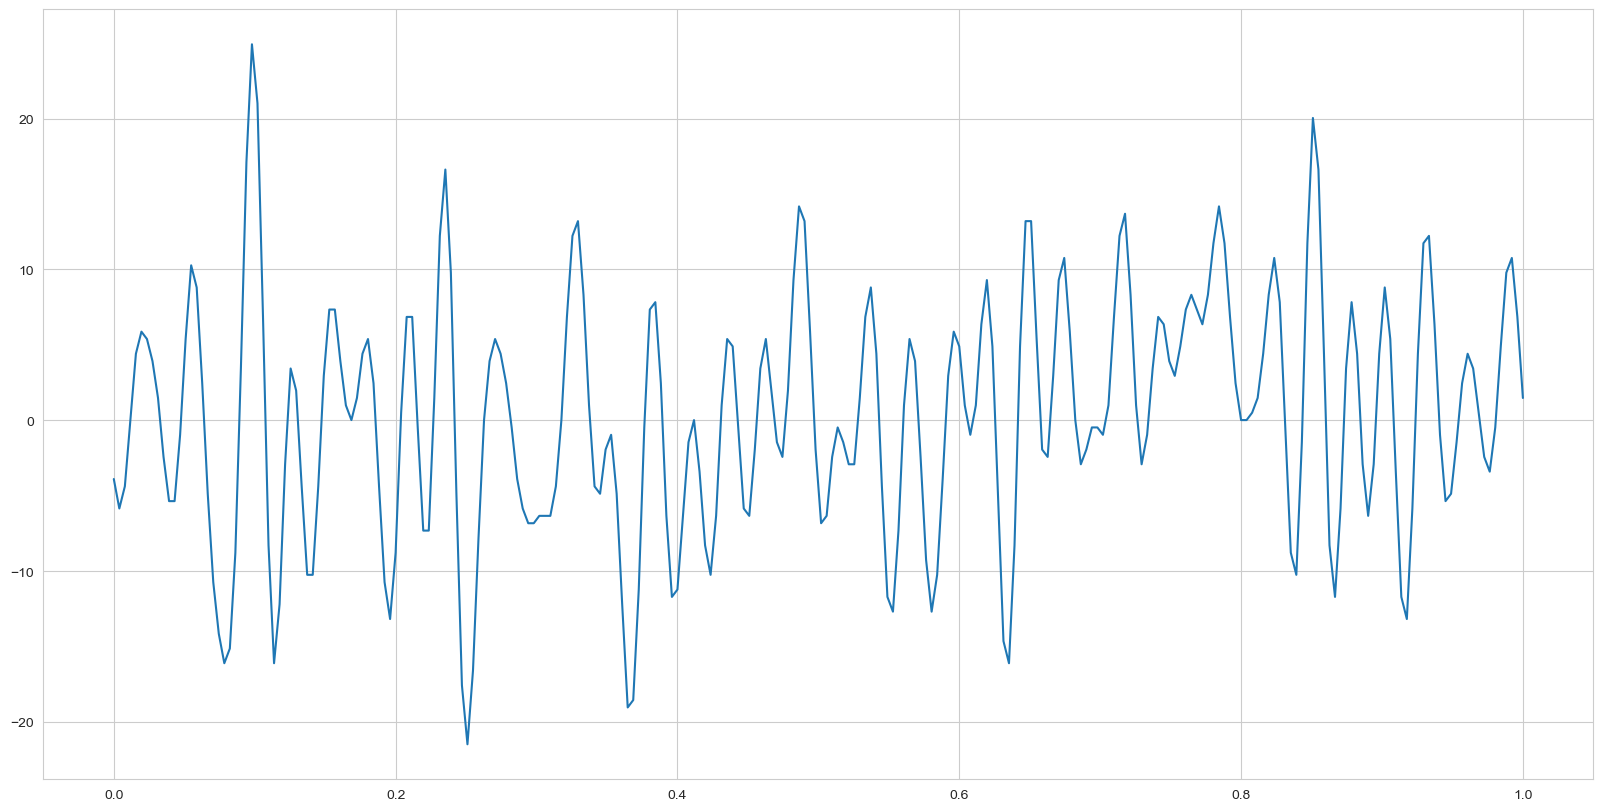

In [7]:

# Se importa el módulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se filtra el Dataframe con solo las lecturas de uns sensor: T8
df_sample = dfA[dfA["sensor_position"] == "T8"]

# Se configura el tamaño del plot
plt.subplots(figsize=(20, 10))

# Se crea la gráfica por medio del método plot
plt.plot(df_sample.time, df_sample.sensor_value)

# Se visualiza la gráfica
plt.show()

Como resultado tenemos un gráfico de líneas o por su nombre en inglés un **Line Plot** *(A veces también se le dice Line Chart)*. En él se puede observar la lectura del sensor **T8** del EEG del individuo **A**, recuerden que este valor se encuentra en microvoltios.

Recapitulando, para la realización de una gráfica con `Matplotlib`, se deben seguir los siguientes pasos:

1. Se debe importar el módulo `pyplot` de la librería `Matplotlib`
2. Se debe inicializar la gráfica por medio del método `plot`.
3. Una vez terminada la inicialización y configuración del **plot** se debe invocar la visualización por medio del método `show`.


Una de las utilidades más comunes de este tipo de visualizaciones es la de comparar dos variables. Por ejemplo, si quisiéramos ver la gráfica de la variación de los valores del sensor en la posición **C1** del individuo **A** y **B**, haríamos lo siguiente:

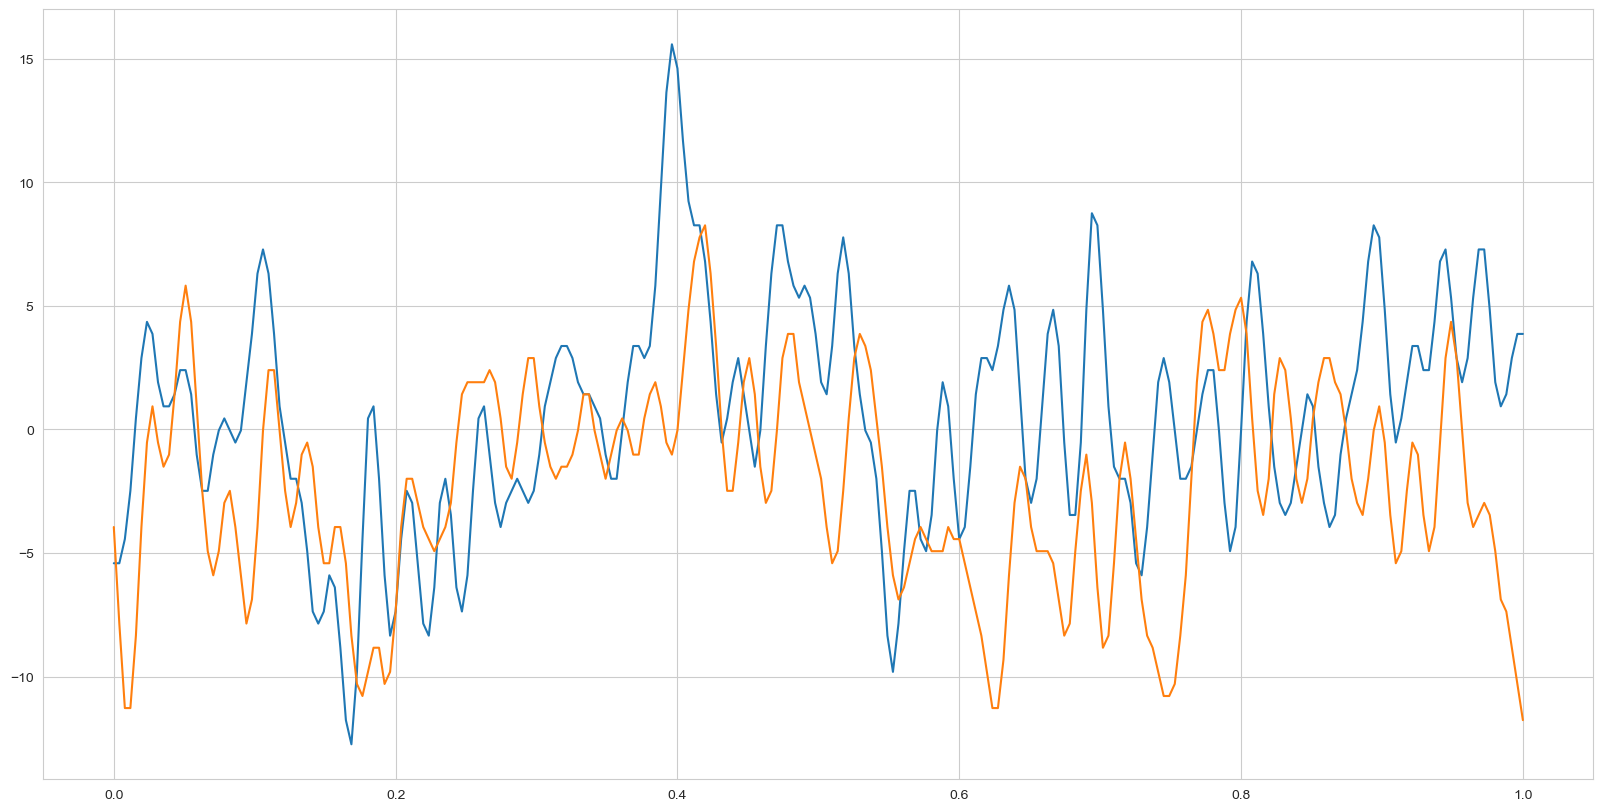

In [8]:
# Se importa el módulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se hace un Dataframe a partir de las lecturas de los sensores en la posición C1 del individuo A y B
dfA_sample = dfA[dfA["sensor_position"] == "P5"]
dfB_sample = dfB[dfB["sensor_position"] == "P5"]

# Se configura el tamaño  del plot
plt.subplots(figsize=(20, 10))

# Se crea la gráfica por medio del método plot
plt.plot(dfA_sample.time, dfA_sample.sensor_value)
plt.plot(dfB_sample.time, dfB_sample.sensor_value)


# Se visualiza la grafica
plt.show()

Se pueden notar como los valores siguen una tendencia muy similar pero la gráfica a primera vista no nos dice de qué se trata. ¿Qué tal si le agregamos un poco de presentación? 

Veamos cómo es de sencillo darle un título y un nombre a sus ejes *(Atención a las líneas 16-26)*:


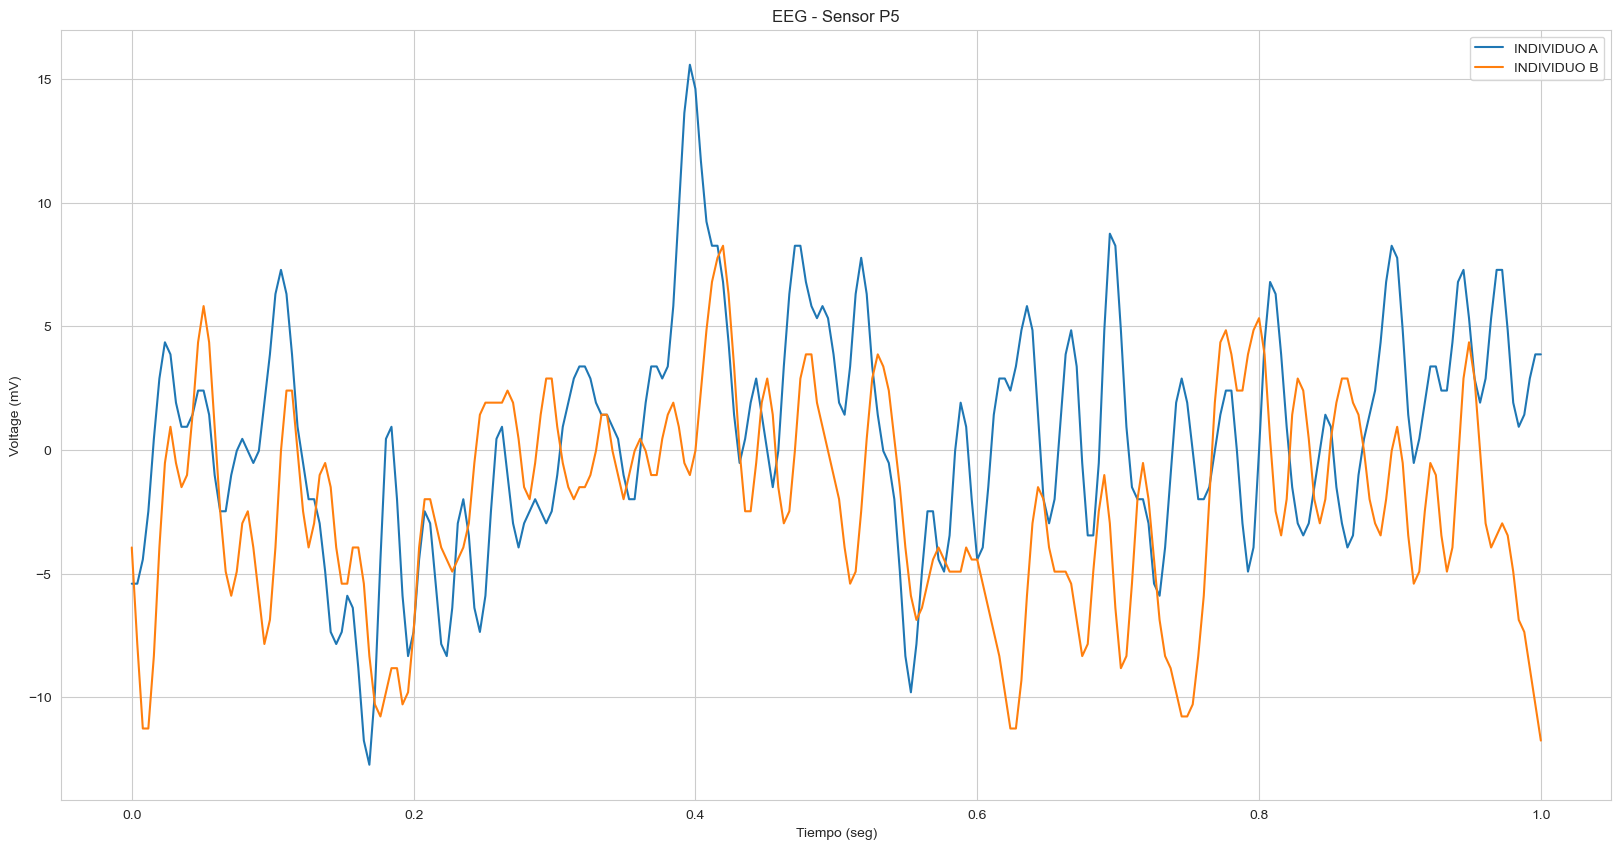

In [9]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se hace un Dataframe a partir de las lecturas de los sensores en la posición P5 del individuo A y B
dfA_sample = dfA[dfA["sensor_position"] == "P5"]
dfB_sample = dfB[dfB["sensor_position"] == "P5"]

# Se configura el tamaño  del plot
plt.subplots(figsize=(20, 10))

# Se crea la grafica por medio del método plot
plt.plot(dfA_sample.time, dfA_sample.sensor_value)
plt.plot(dfB_sample.time, dfB_sample.sensor_value)

# Se habilita la grilla
plt.grid(True)

# Se le dan nombre a los ejes
plt.xlabel('Tiempo (seg)')
plt.ylabel('Voltage (mV)')

# Se le da un título a la grafica
plt.title('EEG - Sensor P5')

# Se configura las leyendas de las líneas
plt.legend(['INDIVIDUO A', 'INDIVIDUO B'])

# Se visualiza la grafica
plt.show()

A ojos de cualquier lector, nuestra grafica ahora tiene un poco más de sentido. 

Hasta aquí hemos visto como crear un gráfico de una línea y de múltiples líneas y con ello hemos aprendido algunos de los métodos básicos de configuración de la librería `Matplotlib`, ahora es el turno para configurar `Colores`, `Estilos` y `Marcadores`.

En especial hablaremos del tercer parámetro del método `plot`:

```
    plt.plot(x, y, '[color][marker][linestyle]')
```

En este caso y retomando la gráfica anterior cambiaremos el color de las líneas:



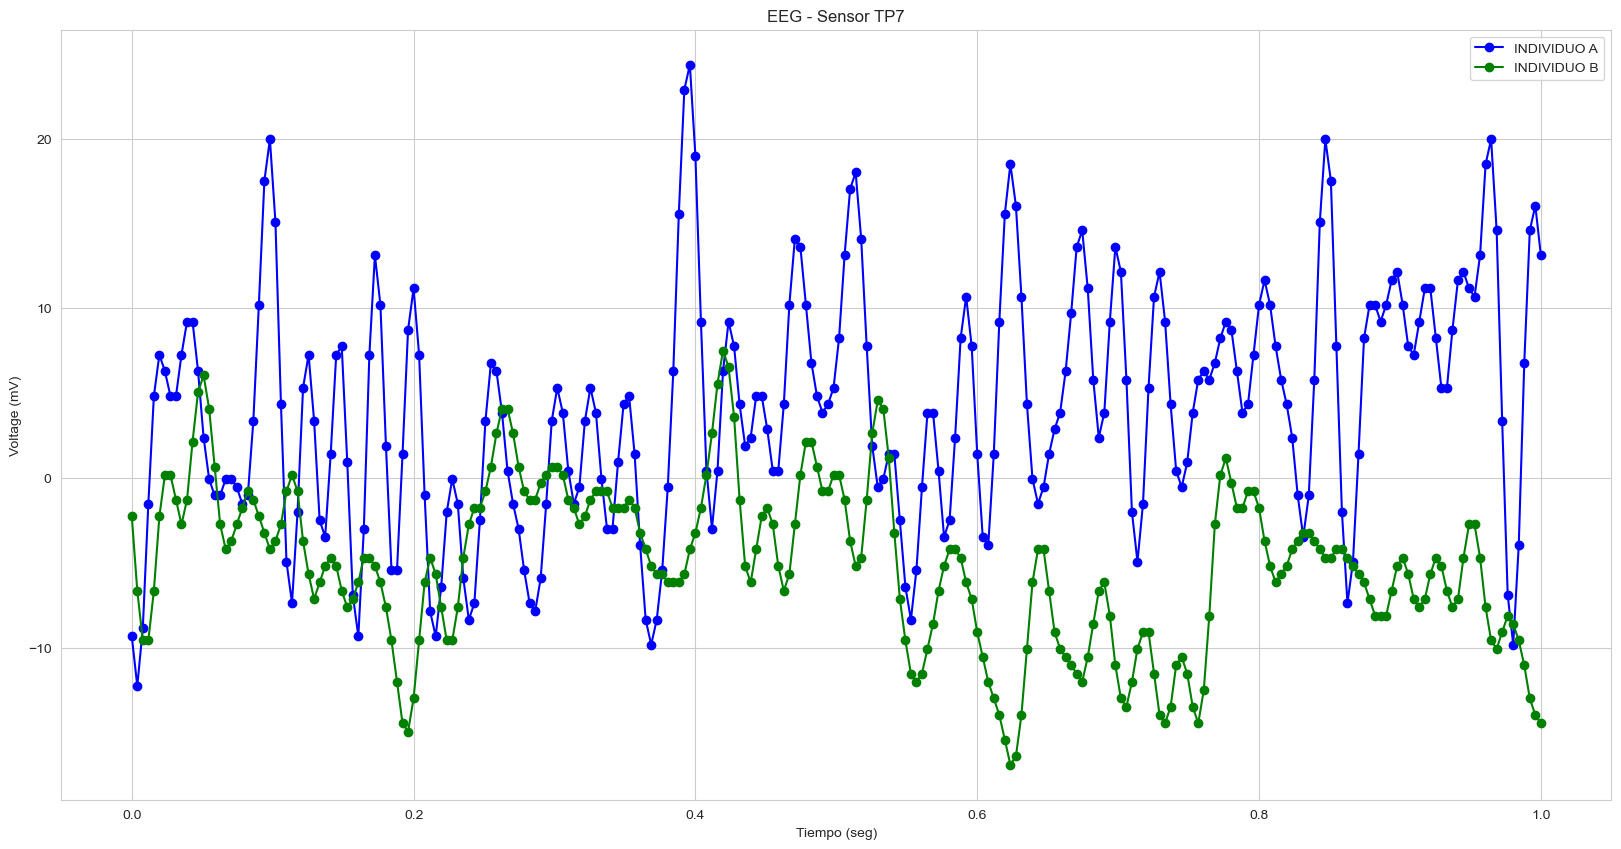

In [10]:
# Se importa el módulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se hace un Dataframe a partir de las lecturas de los sensores en la posición TP7 del individuo A y B
dfA_sample = dfA[dfA["sensor_position"] == "TP7"]
dfB_sample = dfB[dfB["sensor_position"] == "TP7"]

# Se configura el tamaño del plot
plt.subplots(figsize=(20, 10))

# Se crea la gráfica por medio del método plot
plt.plot(dfA_sample.time, dfA_sample.sensor_value, 'ob-')
plt.plot(dfB_sample.time, dfB_sample.sensor_value, 'og-')

# Se habilita la grilla
plt.grid(True)

# Se le dan nombre a los ejes
plt.xlabel('Tiempo (seg)')
plt.ylabel('Voltage (mV)')

# Se le da un título a la grafica
plt.title('EEG - Sensor TP7')

# Se configura las leyendas de las líneas graficadas
plt.legend(['INDIVIDUO A', 'INDIVIDUO B'])

# Se visualiza la grafica
plt.show()

A pesar de que nuestra salida es la misma, las líneas tienen ahora un estilo diferente. Aquí el único cambio fue el tercer argumento del método `plot` *(Líneas 12 y 13)* , en donde se pueden configurar las opciones de visualizaciones y estilos del gráfico. 

*Para saber cómo darle colores, estilos y marcadores a tus gráficas lo mejores es que des [clic aqui](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).*


## Matplotlib directamente desde un Dataset

Como hemos visto hasta ahora, hay que hacer mucho trabajo para construir una gráfica de visualización directamente con la libreria `Matplotlib`, pero ¿qué tal si hay una manera más sencilla de lograrlo? Bueno seria por intermedio de librería de `DataFrames`, tan solo se necesitan una o un par de líneas de código para configurar una gráfica. 

Miremos el ejemplo a continuación:


<AxesSubplot: xlabel='time'>

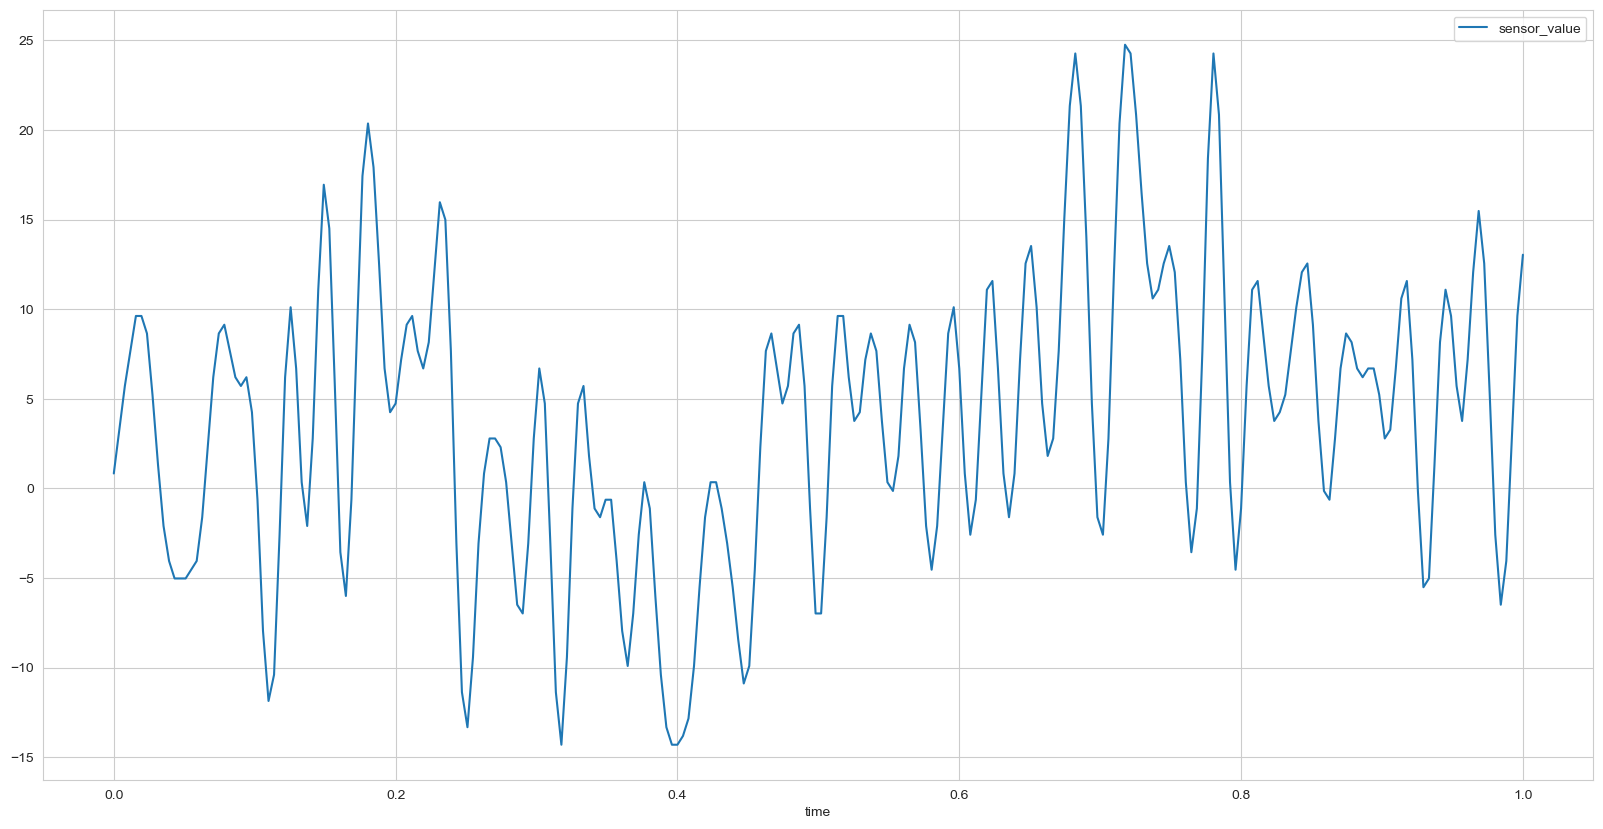

In [11]:
dfA[dfA["sensor_position"] == "FP2"].plot(x="time", y="sensor_value", figsize=(20,10))

## Gráficos 3D
Los datos que estamos estudiando se pueden presentar en una sola gráfica de tal forma que se pueden visualizar todos los sensores *(canales)* de un individuo en particular. Veamos cómo lograrlo por medio de una gráfica en tres dimensiones donde el $eje-x$ representa el tiempo (1 segundo), el $eje-y$ los canales (64) y el $eje-z$ el voltaje medido de cada canal durante el tiempo. 

Para este proposito usaremos `El mplot3d Toolkit`, en [este enlace](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html) se puede ver algunos ejemplos de cómo usarla.


Como los sensores tienen nombres categóricos, debemos cambiarlos a ordinales, para eso creamos un diccionario que asigne a cada sensor un número entre 0 y 63 (canales).

In [12]:
sensor_list = dict()
for ind, sensor in enumerate(dfA.sensor_position.unique()):
    sensor_list[sensor] =  ind
sensor_list

{'FP1': 0,
 'FP2': 1,
 'F7': 2,
 'F8': 3,
 'AF1': 4,
 'AF2': 5,
 'FZ': 6,
 'F4': 7,
 'F3': 8,
 'FC6': 9,
 'FC5': 10,
 'FC2': 11,
 'FC1': 12,
 'T8': 13,
 'T7': 14,
 'CZ': 15,
 'C3': 16,
 'C4': 17,
 'CP5': 18,
 'CP6': 19,
 'CP1': 20,
 'CP2': 21,
 'P3': 22,
 'P4': 23,
 'PZ': 24,
 'P8': 25,
 'P7': 26,
 'PO2': 27,
 'PO1': 28,
 'O2': 29,
 'O1': 30,
 'X': 31,
 'AF7': 32,
 'AF8': 33,
 'F5': 34,
 'F6': 35,
 'FT7': 36,
 'FT8': 37,
 'FPZ': 38,
 'FC4': 39,
 'FC3': 40,
 'C6': 41,
 'C5': 42,
 'F2': 43,
 'F1': 44,
 'TP8': 45,
 'TP7': 46,
 'AFZ': 47,
 'CP3': 48,
 'CP4': 49,
 'P5': 50,
 'P6': 51,
 'C1': 52,
 'C2': 53,
 'PO7': 54,
 'PO8': 55,
 'FCZ': 56,
 'POZ': 57,
 'OZ': 58,
 'P2': 59,
 'P1': 60,
 'CPZ': 61,
 'nd': 62,
 'Y': 63}

Ahora creamos la columna `canal` para asignar el número a cada sensor utilizando el diccionario.
Finalmente organizamos las columnas para representar los datos de cada eje (`time`: $eje-x$, `canal`: $eje-y$, `sensor_value`: $eje-z$)

In [13]:
dfA['canal'] = dfA.sensor_position.apply(lambda x: sensor_list[x])
dfA = dfA[['time', 'sensor_position', 'canal', 'sensor_value']]
dfA.head()

,time,sensor_position,canal,sensor_value
0,0.000000,FP1,0,-8.921
1,0.003922,FP1,0,-8.433
2,0.007843,FP1,0,-2.574
3,0.011765,FP1,0,5.239
4,0.015686,FP1,0,11.587


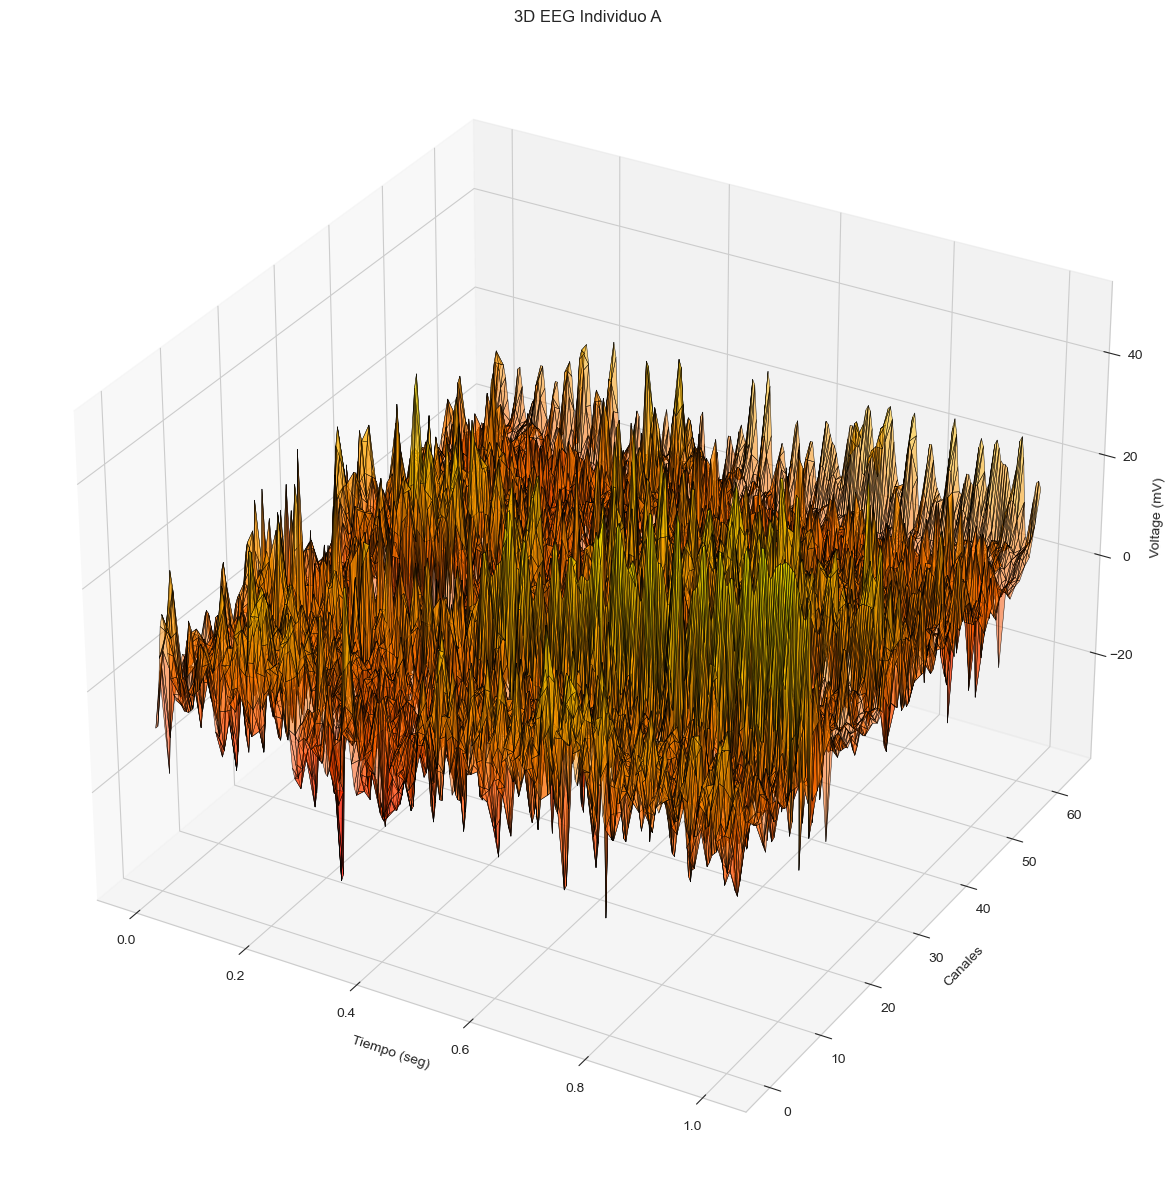

In [14]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Se generan los valores para los diferentes ejes de la gráfica
x = dfA.time
y = dfA.canal
z = dfA.sensor_value

# Se crea el mapa de color
my_cmap = plt.get_cmap('hot')

# Se genera la gráfica
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection ='3d')
ax.plot_trisurf(x, y, z,
                edgecolor = 'black', alpha=0.5, cmap=plt.get_cmap('autumn'), shade=False,
                linewidth = 0.3, antialiased = True)

# Se configuran los estilos de la gráfica
ax.set_xlabel('Tiempo (seg)')
ax.set_ylabel('Canales')
ax.set_zlabel('Voltage (mV)')
ax.set_title('3D EEG Individuo A')

# Se visualiza la gráfica
plt.show()

Otra manera de representar las señales, es por medio de visualizaciones en tres dimensiones, de tal forma que formen una superficie, se les conoce como *surface plot* o grafico de superficies y pueden ser en 2 y 3 dimensiones. 

> Una grafica de una Superficie 3D permite la representación visual de un dataset en 3 dimensiones, y describe la relación funcional entre dos variables independientes, en nuestro caso `tiempo` y `sensor` y una variable dependiente que seria en nuestro caso `el valor del sensor`.

Iniciamos separando los valores y creando un Dataframe para cada canal:


In [15]:
# Separación de los dataframes, se crea un dataframe por cada canal
df_canal = list()
for canal in dfA.canal.unique():
    df_canal.append(dfA[dfA['canal'] == canal])
df_canal[0].head() # Dataframe del primer sensor

,time,sensor_position,canal,sensor_value
0,0.000000,FP1,0,-8.921
1,0.003922,FP1,0,-8.433
2,0.007843,FP1,0,-2.574
3,0.011765,FP1,0,5.239
4,0.015686,FP1,0,11.587


Ahora creamos una **superficie**, pero la modificamos un poco para que solamente muestre las curvas de las señales.

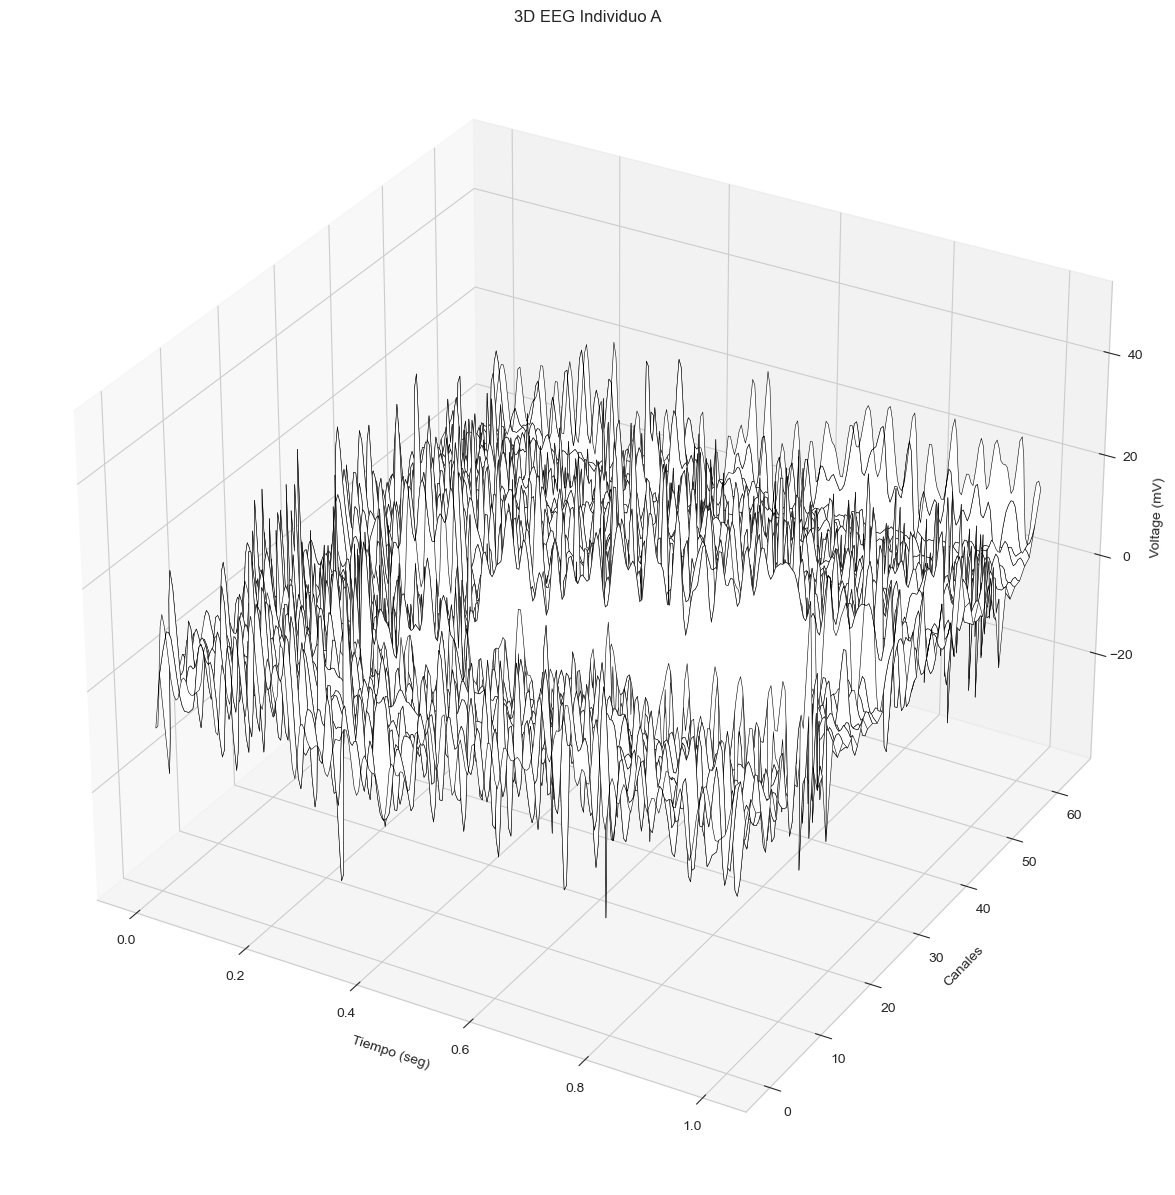

In [16]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Se generan los valores para los diferentes ejes de la gráfica
x = dfA.time.unique()
y = dfA.canal.unique()
X,Y = np.meshgrid(x,y)
Z = np.zeros((len(y),len(x)))
for i in dfA.canal.unique():
    Z[i] = df_canal[i].sensor_value

# Se crea el mapa de colores
my_cmap = plt.get_cmap('hot')

# Se genera la gráfica
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection ='3d')
ax.plot_surface(X, Y, Z, edgecolor = 'black', rstride=1, cstride=256, color='w', shade=False, lw=.4)

# Se configura los detalles de la gráfica
ax.set_xlabel('Tiempo (seg)')
ax.set_ylabel('Canales')
ax.set_zlabel('Voltage (mV)')
ax.set_title('3D EEG Individuo A')

# Se visualiza la gráfica
plt.show()

# Gráficando con Pandas

Desde la librería de `Pandas` podemos invocar directamente la creación de una gráfica, como lo vimos en el anterior ejemplo. Lo interesante es que, los métodos más usuales de la librería, como lo son `Series` y `DataFrame` tienen su propia función `plot`, que no es más que una envoltura del método `plot` de `Matplotlib`.

## Gráfico de Barras

Otra de las visualizaciones más conocidas es el gráfico de Barras o en inglés el **Bar Chart**. Por lo general estos son los tipos de visualizaciones con los que quizás más interactuamos y nos encontramos familiarizados, aunque no seamos tan letrados en el universo de las estadísticas, este es un gráfico que se entiende a primera vista.

Tratemos ahora de visualizar y resumir la información de nuestro dataset [adult](./data/adult.data):




In [17]:
import pandas as pd
import numpy as np

df_adults = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    names=['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry', 'income'],
    header=None,
    skipinitialspace=True
)

df_adults.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Empecemos visualizando el estado marital de los adultos presentes en el dataset:

<AxesSubplot: xlabel='maritalstatus'>

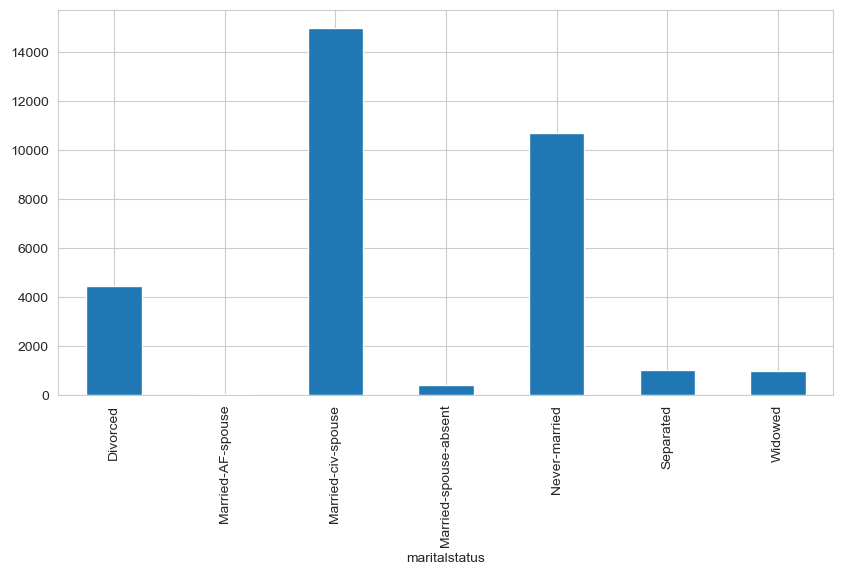

In [18]:
df_adults.groupby(["maritalstatus"]).agg("size").plot.bar(legend=False, figsize=(10, 5))

Ahora agreguemos dos `plots`, para saber quiénes bajo la categoría del estado marital ganan entre **>= 50** y **<= 50**, es decir cómo se distribuyen los ingresos por categoría:

<AxesSubplot: xlabel='maritalstatus'>

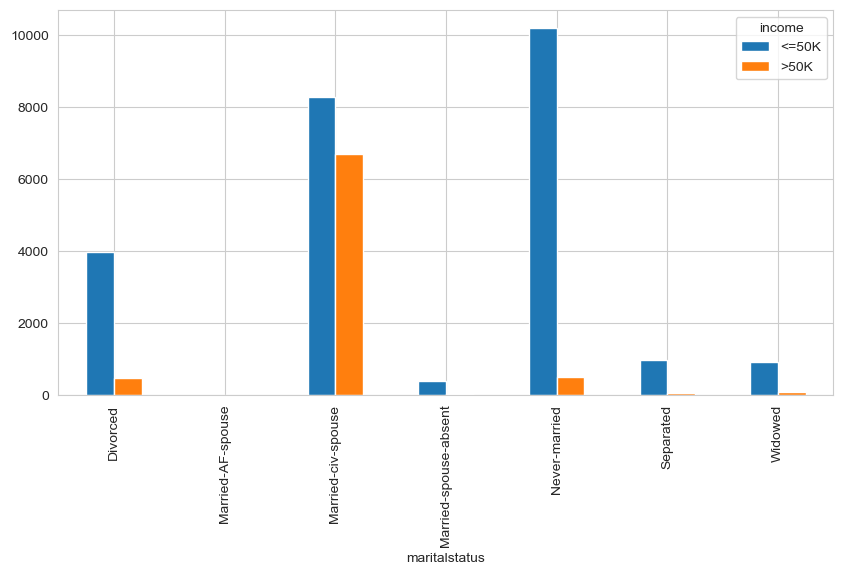

In [19]:
df_adults.groupby(['maritalstatus', 'income']).agg('size').unstack().plot.bar(figsize=(10, 5))

Ahora se puede apreciar que algunos tienen ingresos mejores que otros. Otra de sus aplicaciones más comunes es el llamado **histograma**, veamos un ejemplo retomando el `Dataframe del EEG del individuo A`:

<AxesSubplot: ylabel='Frequency'>

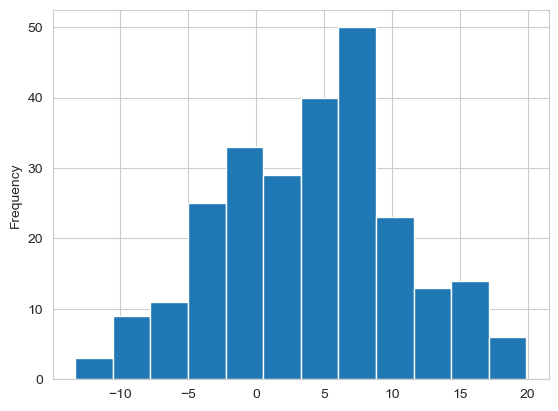

In [20]:
dfA[dfA["sensor_position"] == "FP1"]["sensor_value"].plot.hist(bins=12)

¿Y qué distribución siguen los datos? ¿Una distribución normal o binomial? Por lo general un **histograma** nos pueden dar una pista sobre la distribución de probabilidad que sigue un conjunto de datos.


## Gráfico de Torta

Retomemos el dataset de `Adultos` y vamos a ver cuáles son las ocupaciones que tienen los adultos y  aquí es ideal el uso del famosísimo grafico de torta o por su nombre en inglés **Pie Chart**:



array([<AxesSubplot: ylabel='<=50K'>, <AxesSubplot: ylabel='>50K'>],
      dtype=object)

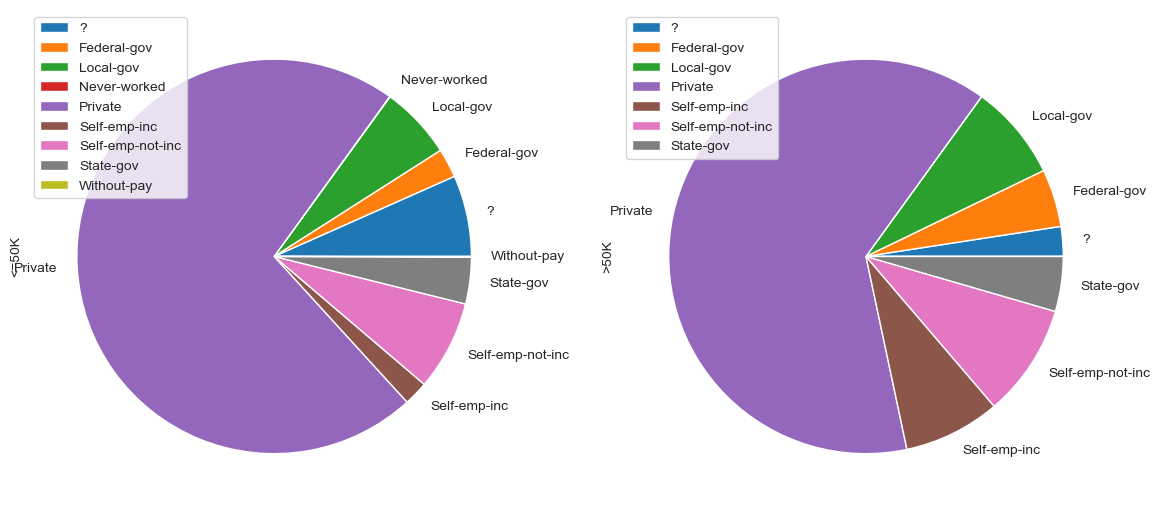

In [25]:
df_adults.groupby(["workclass", "income"]).agg("size").unstack().plot.pie(subplots=True, figsize=(14, 14), legend=True)

Parece que las personas que trabajan en el sector privado son las de mayores ingresos.

# Gráficando con Seaborn

Bien ingresemos al mundo de `Seaborn`. Por lo general y para graficar la relación de dos variables se hace uso del aclamado y venerado `Scatter Plot`, para ello vamos a trabajar ahora con el dataset de [iris](./data/iris.data), empecemos por importar sus datos:

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# Se importa los datos del dataset y se convierten en un DataFrame.
df_iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["largo_sepalo", "ancho_sepalo", "largo_petalo", "ancho_petalo", "clase"])
df_iris.head()

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


`Seaborn` es una de las librerías más usadas en la actualidad, debido a que con poco se logra mucho. Por lo general abstrae en buena medida la complejidad de la libreria `MatPlotLib` y con ello logra que graficar sea una experiencia placentera.

Empecemos realizando una visualización donde podamos ver la relación que existe entre el `largo_sepalo` y `ancho_sepalo`, para ello haremos del método `replot`:



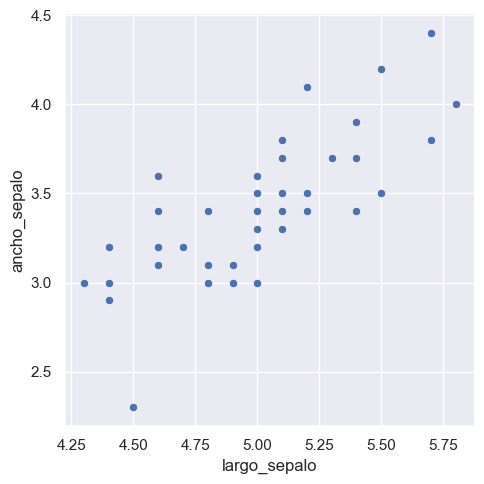

In [27]:

sns.relplot(data=df_iris.query('clase == "Iris-setosa"'), x="largo_sepalo", y="ancho_sepalo")

Esto en cierta medida, muestra la relación que existe entre el largo del pétalo y el ancho, y es que claramente se sigue qué *a mayor largo del sepalo es mayor el ancho de este*. Y nos tocaría hacer lo mismo por cada clase de iris.

¿Sera que es posible visualizar todo el dataset de una vez en una misma grafica? Dado que tenemos 3 clases de iris y seria bastante trabajo tener que crear una a una estas visualizaciones. 

Para ello haremos uso del parámetro **hue** y **style**:



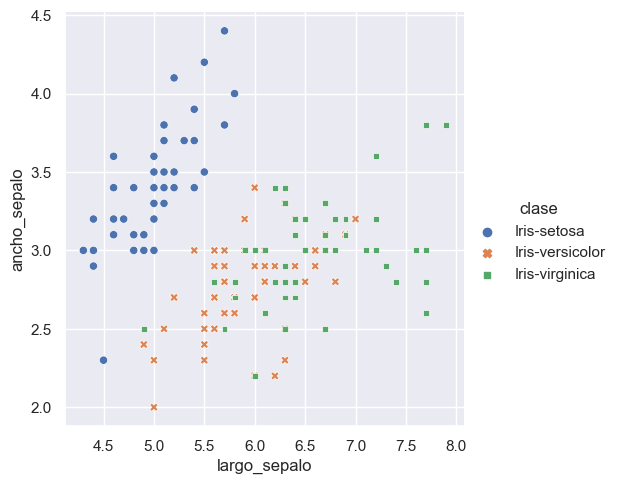

In [28]:
sns.relplot(data=df_iris, x="largo_sepalo", y="ancho_sepalo", hue="clase", style="clase")

Quizás un solo grafico sea complejo de leer. ¿Es posible separarlos por clase? Claro que sí, hagamos uso del parámetro **col**:

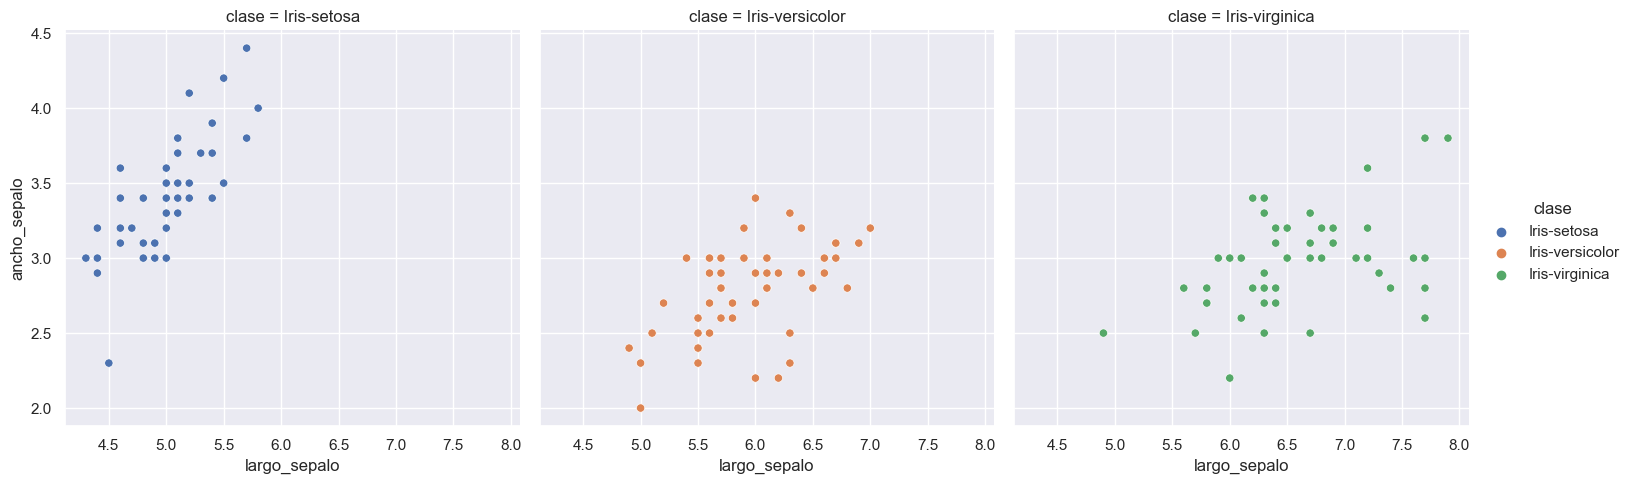

In [29]:
sns.relplot(data=df_iris, x="largo_sepalo", y="ancho_sepalo",  hue="clase", col="clase")

¿mejora su visualización? Por supuesto que sí, y es ahí donde `Seaborn` nos demuestra que es una gran herramienta en el mundo de las visualizaciones.


# Gráficas de Radar (Radar Plot)

Para finalizar, tratemos de comparar las clases de iris en sus cuatro variables por medio de un gráfico comúnmente conocido como **Radar Plot**. 

> Este tipo de visualizaciones es de gran ayuda para disponer datos de múltiples variables en 2D, las variables se encuentran en los ejes (que por su nombre siguen la forma de un radar). Los ejes se encuentran en positiva relativa al centro y siguen una disposición uniforme.

En este tipo de gráficos se suele *escalar* (normalizar) los datos, de tal manera que todos queden en la misma "escala" (por ejemplo, todos se transformen a una escala de 0 a 1), y para saber un poco más al respecto [clic aquí](https://ml-concepts.com/2021/10/08/min-max-normalization/).



In [30]:
# Se crea una copia del dataset por cada clase de iris (sin la columna clase)
df_setosa = df_iris[df_iris['clase'] == 'Iris-setosa'].drop("clase", axis=1)
df_versicolor = df_iris[df_iris['clase'] == 'Iris-versicolor'].drop("clase", axis=1)
df_virginica = df_iris[df_iris['clase'] == 'Iris-virginica'].drop("clase", axis=1)

# Se escala por MinMax.
df_setosa = (df_setosa - df_setosa.min()) / (df_setosa.max() - df_setosa.min())
df_versicolor = (df_versicolor - df_versicolor.min()) / (df_versicolor.max() - df_versicolor.min())
df_virginica = (df_virginica - df_virginica.min()) / (df_virginica.max() - df_virginica.min())

Con los datos normalizados podemos encontrar el promedio de cada variable *(ancho_sepalo, largo_sepalo, ...)* de cada tipo de iris (Para ello hacemos uso del método  `mean`):

In [31]:
# Se crea el DataFrame con los datos normalizados
df_iris_normalized = pd.DataFrame([
    df_setosa.mean(),
    df_versicolor.mean(),
    df_virginica.mean()
], index=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

df_iris_normalized

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo
Iris-setosa,0.470667,0.532381,0.515556,0.288000
Iris-versicolor,0.493333,0.550000,0.600000,0.407500
Iris-virginica,0.562667,0.483750,0.438333,0.569091


Y con estos valores promediados podemos crear nuestro `Radar Plot`:

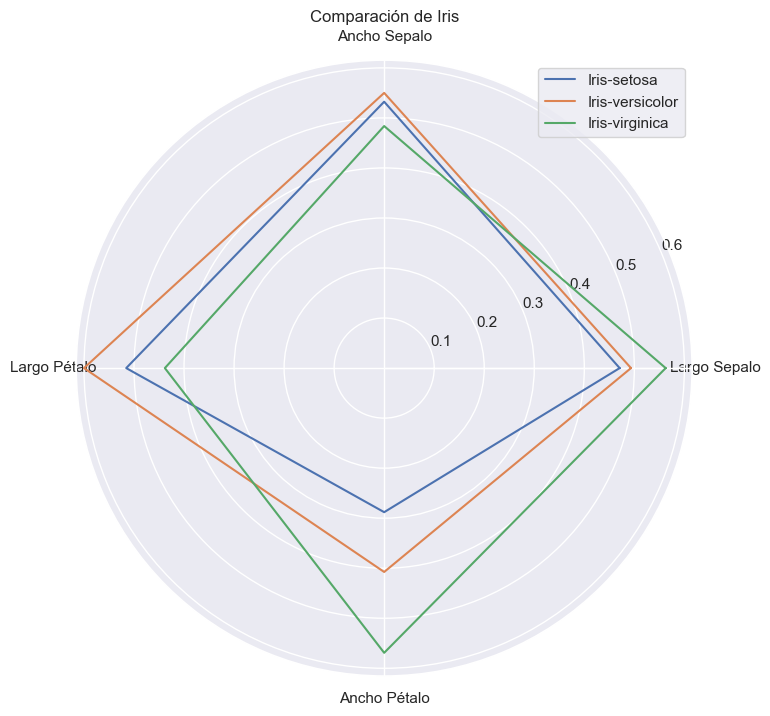

In [32]:
# Se crea una copia del DataFrame
df_radar = df_iris_normalized.copy()

# Se configuran las etiquetas
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len([*df_radar.iloc[[0]].values.tolist()[0], df_radar.iloc[[0]].values.tolist()[0][0]]))
plt.figure(figsize=(8, 8))

# Se crear el subplot
plt.subplot(polar=True)

# Por cada clase de iris se crea el plot
plt.plot(label_loc, [*df_radar.iloc[[0]].values.tolist()[0], df_radar.iloc[[0]].values.tolist()[0][0]], label="Iris-setosa")
plt.plot(label_loc, [*df_radar.iloc[[1]].values.tolist()[0], df_radar.iloc[[1]].values.tolist()[0][0]], label="Iris-versicolor")
plt.plot(label_loc, [*df_radar.iloc[[2]].values.tolist()[0], df_radar.iloc[[2]].values.tolist()[0][0]], label="Iris-virginica")

# Se organizan las etiquetas alrededor del gráfico
plt.thetagrids(np.degrees(label_loc), labels=['Largo Sepalo', 'Ancho Sepalo', 'Largo Pétalo', 'Ancho Pétalo', ''])

# Se configura la presentación y se visualiza el gráfico
plt.title('Comparación de Iris')
plt.legend()
plt.show()

In [ ]:
# TODO: exportar gráficas!
# TODO: cambiar estilo de las curvas